In [110]:
import numpy as np
import pandas as pd
import importlib
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt
from mylibs import resample as rs
from mylibs import metrics as me

In [79]:
importlib.reload(rs)
importlib.reload(me)

<module 'mylibs.metrics' from '/home/vinicius/Dropbox/UFC - Ciência da Computação/7° Semestre/Aprendizado de Máquina/jupyter-notebooks/mylibs/metrics.py'>

In [81]:
pd.options.display.float_format = '{:.2f}'.format

### Importando os dados

In [38]:
data = pd.read_csv("../datasets/winequality-red.csv",delimiter=';')

In [40]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [58]:
data_ = data.values

In [67]:
X = data_[:,:11]
y = data_[:,11]

### Questão 02

In [46]:
n_lin = data.shape[0]

In [48]:
idx_train,idx_test = rs.split_k_fold(n_lin,5)

In [74]:
model_SGDRegressor = linear_model.SGDRegressor()
model_LinearRegression = linear_model.LinearRegression()
model_LinearSVR = svm.LinearSVR()
model_SVR = svm.SVR()
model_RandomForest = ensemble.RandomForestRegressor()
model_GradientBoosting = ensemble.GradientBoostingRegressor()

#### SGDRegressor

In [90]:
total_sgd = 0.0
for i in range(5):
    model_SGDRegressor.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_SGDRegressor.predict(X[idx_test[i]])
    total_sgd = total_sgd + me.mse(y[idx_test[i]],y_pred)

/home/vinicius/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [92]:
total_sgd = total_sgd / 5
print(total_sgd)

2.3788660512969353e+24


#### Linear Regression

In [99]:
total_linear = 0.0
for i in range(5):
    model_LinearRegression.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_LinearRegression.predict(X[idx_test[i]])
    total_linear = total_linear + me.mse(y[idx_test[i]],y_pred)

In [100]:
total_linear = total_linear / 5.0
print(total_linear)

0.427502486508126


#### Linear SVR

In [101]:
total_linearsvr = 0.0
for i in range(5):
    model_LinearSVR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_LinearSVR.predict(X[idx_test[i]])
    total_linearsvr = total_linearsvr + me.mse(y[idx_test[i]],y_pred)

In [102]:
total_linearsvr = total_linearsvr / 5.0
print(total_linearsvr)

1.0837340505725106


#### SVR

In [103]:
total_svr = 0.0
for i in range(5):
    model_SVR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_SVR.predict(X[idx_test[i]])
    total_svr = total_svr + me.mse(y[idx_test[i]],y_pred)

In [104]:
total_svr = total_svr / 5.0
print(total_svr)

0.482718895526231


#### Random Forest

In [105]:
total_random = 0.0
for i in range(5):
    model_RandomForest.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_RandomForest.predict(X[idx_test[i]])
    total_random = total_random + me.mse(y[idx_test[i]],y_pred)

In [106]:
total_random = total_random / 5.0
print(total_random)

0.3752562893081761


#### Gradient Boosting

In [107]:
total_gradient = 0.0
for i in range(5):
    model_GradientBoosting.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = model_GradientBoosting.predict(X[idx_test[i]])
    total_gradient = total_gradient + me.mse(y[idx_test[i]],y_pred)

In [108]:
total_gradient = total_gradient / 5.0
print(total_gradient)

0.3861389245258457


### Questão 03

In [115]:
class_names = ['Linear Regression','Linear SVR','SVR','Random Forest','Gradient Boosting']
class_ = [total_linear,total_linearsvr,total_svr,total_random,total_gradient]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

Linear Regression: 0.427502486508126
Linear SVR: 1.0837340505725106
SVR: 0.482718895526231
Random Forest: 0.3752562893081761
Gradient Boosting: 0.3861389245258457


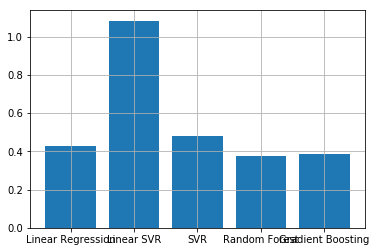

In [116]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names);

### Questão 04

In [121]:
model_final = ensemble.RandomForestRegressor()
model_final.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [122]:
y_pred = model_final.predict(X)

In [123]:
me.mse(y,y_pred)

0.06379612257661038

### Questão 05

Gradiente descendente é o processo de minimizar uma função. E o gradiente descendente estocástico avalia e atualiza os coeficientes a cada iteração para minimizar o erro de um modelo.